## Task #1

In [ ]:
#using pandas library to import the data series
import pandas as pd
#using matplotlib library to graph
import matplotlib.pyplot as plt
#rename the origial data "Nat_gas" as "data"
data = pd.read_csv(r"/content/Nat_Gas.csv")

In [ ]:
print(data)

       Dates  Prices
0   10/31/20   10.10
1   11/30/20   10.30
2   12/31/20   11.00
3    1/31/21   10.90
4    2/28/21   10.90
5    3/31/21   10.90
6    4/30/21   10.40
7    5/31/21    9.84
8    6/30/21   10.00
9    7/31/21   10.10
10   8/31/21   10.30
11   9/30/21   10.20
12  10/31/21   10.10
13  11/30/21   11.20
14  12/31/21   11.40
15   1/31/22   11.50
16   2/28/22   11.80
17   3/31/22   11.50
18   4/30/22   10.70
19   5/31/22   10.70
20   6/30/22   10.40
21   7/31/22   10.50
22   8/31/22   10.40
23   9/30/22   10.80
24  10/31/22   11.00
25  11/30/22   11.60
26  12/31/22   11.60
27   1/31/23   12.10
28   2/28/23   11.70
29   3/31/23   12.00
30   4/30/23   11.50
31   5/31/23   11.20
32   6/30/23   10.90
33   7/31/23   11.40
34   8/31/23   11.10
35   9/30/23   11.50
36  10/31/23   11.80
37  11/30/23   12.20
38  12/31/23   12.80
39   1/31/24   12.60
40   2/29/24   12.40
41   3/31/24   12.70
42   4/30/24   12.10
43   5/31/24   11.40
44   6/30/24   11.50
45   7/31/24   11.60
46   8/31/24 

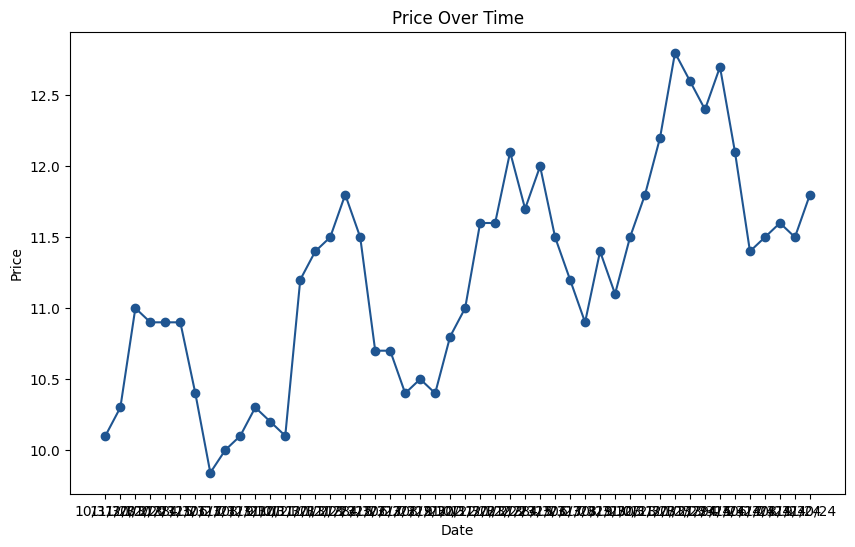

In [ ]:
#graph to have a first look about the data
#variables
dates = data["Dates"]
price = data["Prices"]

#Plot
plt.figure(figsize=(10, 6))
plt.plot(dates, price, marker='o', linestyle='-', color='#1F5591')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<Figure size 1200x400 with 0 Axes>

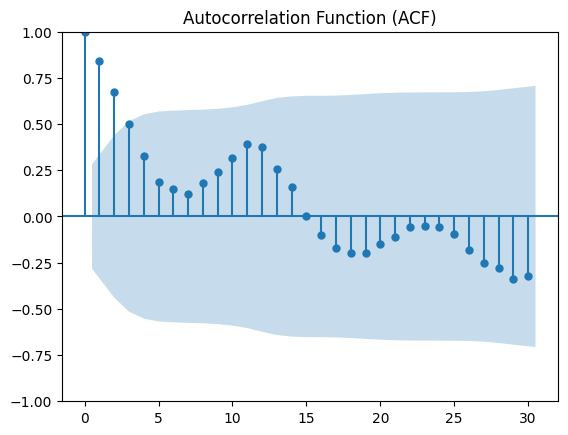

In [ ]:
#Analize the nature of the time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
# Plot ACF (Autocorrelation Function)
plt.figure(figsize=(12, 4))
plot_acf(data['Prices'], lags=30, title='Autocorrelation Function (ACF)')
plt.show()

<Figure size 1200x400 with 0 Axes>

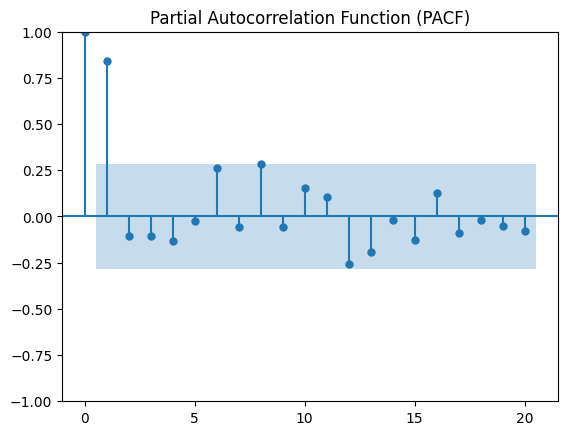

In [ ]:
#PACF
plt.figure(figsize=(12, 4))
plot_pacf(data['Prices'], lags=20, title='Partial Autocorrelation Function (PACF)')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 Prices   No. Observations:                   48
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -21.514
Date:                Wed, 13 Dec 2023   AIC                             51.028
Time:                        20:58:44   BIC                             58.513
Sample:                             0   HQIC                            53.857
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1666      0.319     35.059      0.000      10.542      11.791
ar.L1          0.9986      0.186      5.371      0.000       0.634       1.363
ar.L2         -0.1478      0.194     -0.760      0.4

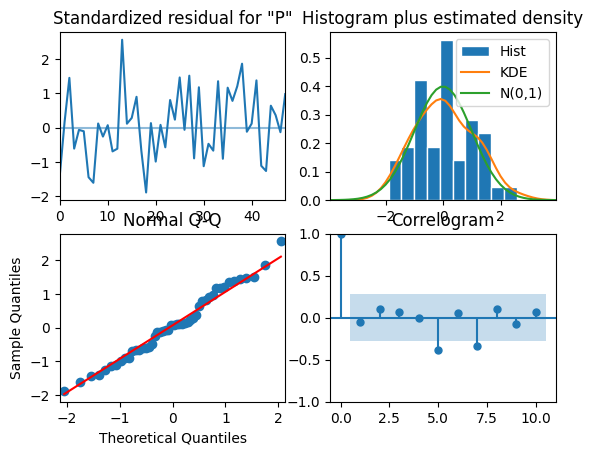

In [ ]:
#I'm going to forecast using a ARMA(2,0) model
model = ARIMA(data['Prices'], order=(2, 0, 0))
results = model.fit()
# Display model summary
print(results.summary())
# Plot diagnostics
results.plot_diagnostics()
plt.show()
#The error is white noise the Ljung-box coefficient confirms it, also the 2 lags are significant but the first lag it's
#almost 1, so I did a ADF test to prove the existence of unit root

In [ ]:
#ADF to prove unit root
result = adfuller(data['Prices'], autolag='AIC')
test_statistic, p_value, _, _, _, _ = result
print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')
# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is non-stationary.")

Test Statistic: 0.21807686169999427
P-value: 0.973257438844869
Fail to reject the null hypothesis: The data is non-stationary.


In [ ]:
#Running the model again with one differencing and seasonality
import statsmodels.api as sm

# Assuming 'data' is your DataFrame with a datetime index and 'Prices' column
order = (2, 1, 0)
seasonal_order = (2, 1, 0, 12)

# Fit SARIMA model
sarima_model = sm.tsa.SARIMAX(data['Prices'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# View model summary
print(sarima_results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                             Prices   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                   0.870
Date:                            Wed, 13 Dec 2023   AIC                              8.260
Time:                                    22:14:35   BIC                             16.037
Sample:                                         0   HQIC                            10.944
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7654      0.185     -4.147      0.000      -1.127      -0.404
ar.L2         -0.4605      0.173   

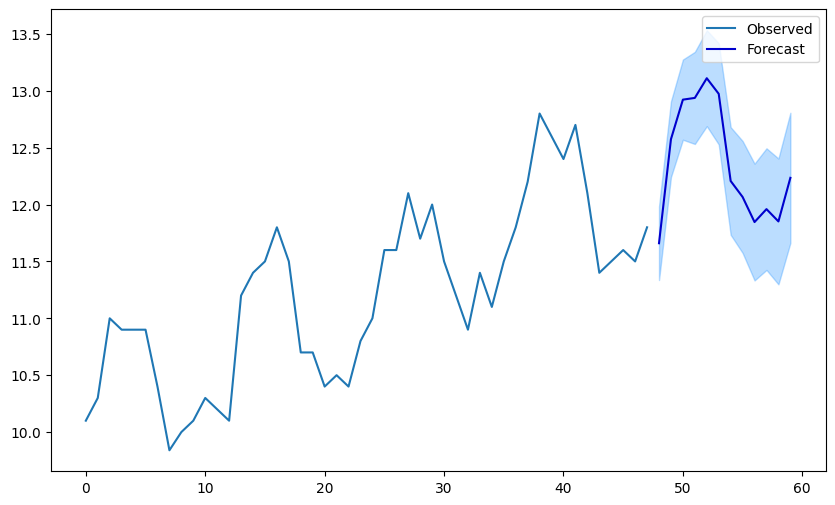

In [ ]:
# Forecast for the next year using SARIMA(2,1,0,12) model
n_periods = 12
forecast = sarima_results.get_forecast(steps=n_periods)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Prices'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='#0000CD', label='Forecast')
plt.fill_between(forecast.predicted_mean.index,
                 forecast.conf_int()['lower Prices'],
                 forecast.conf_int()['upper Prices'], color='#1E90FF', alpha=0.3)
plt.legend()
plt.show()


In [ ]:
#Monthly forecast
forecast_values = forecast.predicted_mean

for i, value in enumerate(forecast_values):
    print(f"Month {i+1}: {round(value,2)}")

Month 1: 11.66
Month 2: 12.57
Month 3: 12.92
Month 4: 12.94
Month 5: 13.11
Month 6: 12.97
Month 7: 12.21
Month 8: 12.07
Month 9: 11.85
Month 10: 11.96
Month 11: 11.85
Month 12: 12.23


## Task #1 - JPMC answer

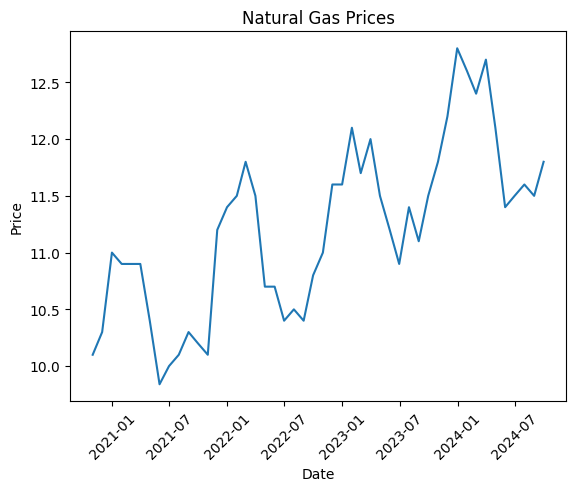

In [ ]:
#libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates']) #Makes "Dates" a datetime object instead a string or numeric value
prices = df['Prices'].values
dates = df['Dates'].values

# plot prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()



In [ ]:
# First we need the dates in terms of days from the start, to make it easier to interpolate later.
start_date = date(2020,10,31)
end_date = date(2024,9,30)
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1

days_from_start = [(day - start_date ).days for day in months]


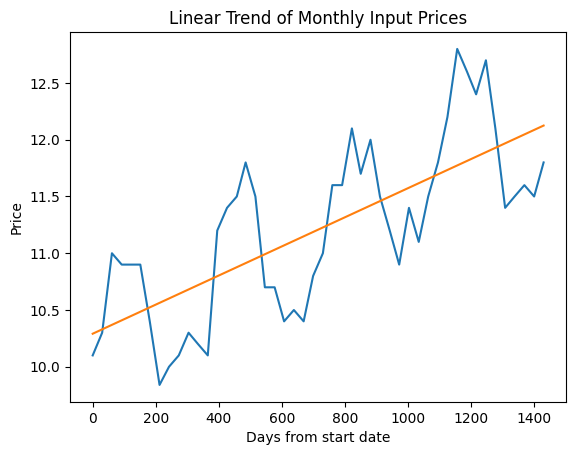

0.001282373598760221 10.29104112595228


In [ ]:
# Simple regression for the trend will fit to a model y = Ax + B. The estimator for the slope is given by \hat{A} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2},
# and that for the intercept by \hat{B} = \bar{y} - hat{A} * \xbar

def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar))/ np.sum((x - xbar)**2)
    intercept = ybar - slope*xbar
    return slope, intercept

time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot linear trend
plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()
print(slope, intercept)


Text(0.5, 1.0, 'Smoothed Estimate of Monthly Input Prices')

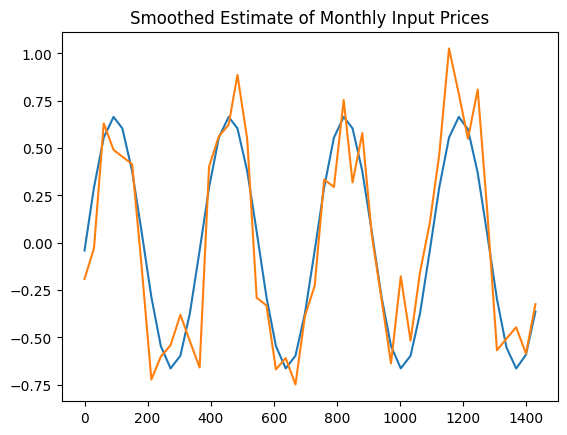

In [ ]:
# From this plot we see the linear trend has been captured. Now to fit the intra-year variation.
# Given that natural gas is used more in winter, and less in summer, we can guess the frequency of the price movements to be about a year, or 12 months.
# Therefore we have a model y = Asin( kt + z ) with a known frequency.Rewriting y = Acos(z)sin(kt) + Asin(z)cos(kt),
# we can use bilinear regression, with no intercept, to solve for u = Acos(z), w = Asin(z)

sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))

def bilinear_regression(y, x1, x2):
    # Bilinear regression without an intercept amounts to projection onto the x-vectors
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)

# We now recover the original amplitude and phase shift as A = slope1 ** 2 + slope2 ** 2, z = tan^{-1}(slope2/slope1)
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

# Plot smoothed estimate of full dataset
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')

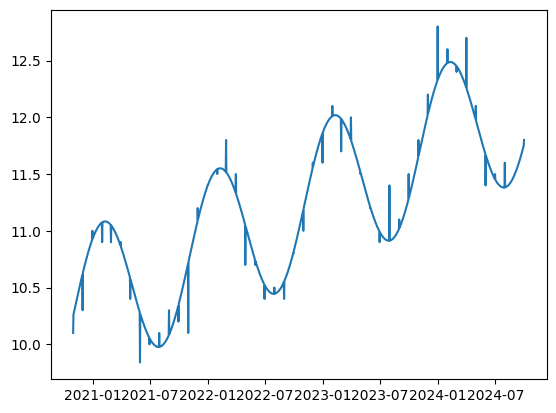

In [ ]:
# Define the interpolation/extrapolation function
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Exact match found in the data
        return prices[days_from_start.index(days)]
    else:
        # Interpolate/extrapolate using the sin/cos model
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Create a range of continuous dates from start date to end date
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate of the full dataset using interpolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')


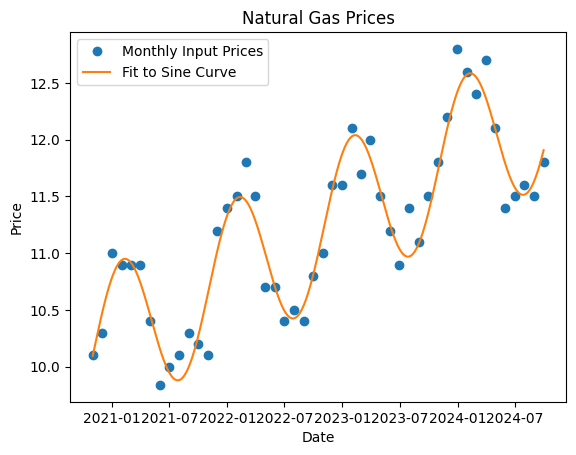

In [ ]:
# Fit the monthly input prices to the sine curve
x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()
plt.show()


## Task #2

In [ ]:
def PrincingModel (injt_date, whtwl_date, initial_price, final_price, max_volume, str_cost):
  #Initial trade agreement
  trade = (final_price - initial_price) * 1000000
  millions = abs(trade/1000000)
  ##Deductions and other costs
  #Injection/withdrawal dates
  inout_times = injt_date + whtwl_date
  trade = trade - (inout_times * 10000 * millions)
  #transport fees
  trade = trade - (inout_times * 50000)
  #storage
  storage_cost = max_volume * str_cost
  trade = trade - storage_cost
  trade_rtn = (trade/1000000) * 100
  trade_profit = f"The estimate contract value of the proposal trade is {trade} with a return of {trade_rtn}%"
  return trade_profit

In [ ]:
PrincingModel(4,3,3,5,100000,3)

'The estimate contract value of the proposal trade is 1210000.0 with a return of 121.0%'

## Task #2 - JPMC answer

In [ ]:
from datetime import date
import math

def price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, total_vol, injection_withdrawal_cost_rate):
    volume = 0
    buy_cost = 0
    cash_in = 0
    last_date = min(min(in_dates), min(out_dates))

    # Ensure dates are in sequence
    all_dates = sorted(set(in_dates + out_dates))
      #set is like a list but doesn't allow duplicate elements

    for i in range(len(all_dates)):
        # processing code for each date
        start_date = all_dates[i]

        if start_date in in_dates:
            # Inject on these dates and sum up cash flows
            if volume <= total_vol - rate:
                volume += rate

                # Cost to purchase gas
                buy_cost += rate * in_prices[in_dates.index(start_date)]
                # Injection cost
                injection_cost = rate * injection_withdrawal_cost_rate
                buy_cost += injection_cost
                print('Injected gas on %s at a price of %s'%(start_date, in_prices[in_dates.index(start_date)]))

            else:
                # We do not want to inject when rate is greater than total volume minus volume
                print('Injection is not possible on date %s as there is insufficient space in the storage facility'%start_date)
        elif start_date in out_dates:
            #Withdraw on these dates and sum cash flows
            if volume >= rate:
                volume -= rate
                cash_in += rate * out_prices[out_dates.index(start_date)]
                # Withdrawal cost
                withdrawal_cost = rate * injection_withdrawal_cost_rate
                cash_in -= withdrawal_cost
                print('Extracted gas on %s at a price of %s'%(start_date, out_prices[out_dates.index(start_date)]))
            else:
                # we cannot withdraw more gas than is actually stored
                print('Extraction is not possible on date %s as there is insufficient volume of gas stored'%start_date)

    store_cost = math.ceil((max(out_dates) - min(in_dates)).days // 30) * storage_cost_rate
    return cash_in - store_cost - buy_cost

# Example usage of price_contract()
in_dates = [date(2022, 1, 1), date(2022, 2, 1), date(2022, 2, 21), date(2022, 4, 1)] #injection dates
in_prices = [20, 21, 20.5, 22]#prices on the injection days
out_dates = [date(2022, 1, 27), date(2022, 2, 15), date(2022, 3, 20), date(2022, 6, 1)] # extraction dates
out_prices = [23, 19, 21, 25] # prices on the extraction days
rate = 100000  # rate of gas in cubic feet per day
storage_cost_rate = 10000  # total volume in cubic feet
injection_withdrawal_cost_rate = 0.0005  # $/cf
max_storage_volume = 500000 # maximum storage capacity of the storage facility
result = price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, max_storage_volume, injection_withdrawal_cost_rate)
print()
print(f"The value of the contract is: ${result}")


Injected gas on 2022-01-01 at a price of 20
Extracted gas on 2022-01-27 at a price of 23
Injected gas on 2022-02-01 at a price of 21
Extracted gas on 2022-02-15 at a price of 19
Injected gas on 2022-02-21 at a price of 20.5
Extracted gas on 2022-03-20 at a price of 21
Injected gas on 2022-04-01 at a price of 22
Extracted gas on 2022-06-01 at a price of 25

The value of the contract is: $399600.0


## Task #3

In [ ]:
#import the database
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv(r"/content/Task 3 and 4_Loan_Data.csv")

In [ ]:
print(data)

      customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0         8153374                         0           5221.545193   
1         7442532                         5           1958.928726   
2         2256073                         0           3363.009259   
3         4885975                         0           4766.648001   
4         4700614                         1           1345.827718   
...           ...                       ...                   ...   
9995      3972488                         0           3033.647103   
9996      6184073                         1           4146.239304   
9997      6694516                         2           3088.223727   
9998      3942961                         0           3288.901666   
9999      5533570                         1           1917.652480   

      total_debt_outstanding       income  years_employed  fico_score  default  
0                3915.471226  78039.38546               5         605        0  
1        

In [ ]:
#cleaning the database
datos = data.iloc[:,1:8]
#rename variables
y = data.iloc[:,7]
print(y)
x = data.iloc[:,1:7]
print(x)

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64
      credit_lines_outstanding  loan_amt_outstanding  total_debt_outstanding  \
0                            0           5221.545193             3915.471226   
1                            5           1958.928726             8228.752520   
2                            0           3363.009259             2027.830850   
3                            0           4766.648001             2501.730397   
4                            1           1345.827718             1768.826187   
...                        ...                   ...                     ...   
9995                         0           3033.647103             2553.733144   
9996                         1           4146.239304             5458.163525   
9997                         2           3088.223727             4813.090925   
9998                         0           3288.9

In [ ]:
#logit regression to clasiffy D and ND
data = pd.concat([y, x], axis=1) #axis=1 equals to cbind, 0 to rbind
# Add a constant term
x = sm.add_constant(x)
# Fit the logistic regression model
model = sm.Logit(y, x)
result = model.fit()
# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.001862
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                  0.9961
Time:                        04:33:30   Log-Likelihood:                -18.623
converged:                       True   LL-Null:                       -4790.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       51.1432     13.432      3.808      0.000      24.81

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make Predictions
y_pred_prob = result.predict(x)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Accuracy
accuracy = accuracy_score(y, y_pred)

# Print Results
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[8143    6]
 [   8 1843]]
Accuracy: 0.9986


## Task #3 - JPMC answer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd

# Define the variable features
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

df = data

# Calculate the payment_to_income ratio
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']

# Calculate the debt_to_income ratio
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']

clf = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[features], df['default'])
print(clf.coef_, clf.intercept_)

# Use the following code to check yourself
y_pred = clf.predict(df[features])

fpr, tpr, thresholds = metrics.roc_curve(df['default'], y_pred)
print((1.0*(abs(df['default']-y_pred)).sum()) / len(df))
print(metrics.auc(fpr, tpr))


[[ 8.18520373  0.54490854  0.01994244 -2.77630853 -0.02418391]] [-0.09162643]
0.0037
0.9925106069101026


## Task #4

In [ ]:
print(y)
print(x)

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64
      credit_lines_outstanding  loan_amt_outstanding  total_debt_outstanding  \
0                            0           5221.545193             3915.471226   
1                            5           1958.928726             8228.752520   
2                            0           3363.009259             2027.830850   
3                            0           4766.648001             2501.730397   
4                            1           1345.827718             1768.826187   
...                        ...                   ...                     ...   
9995                         0           3033.647103             2553.733144   
9996                         1           4146.239304             5458.163525   
9997                         2           3088.223727             4813.090925   
9998                         0           3288.9

In [ ]:
#Having the dataset, y and x previously defined from the previous task
import pandas as pd

#discretizing "fico_score" in 5 sections
bins = [300, 579, 669, 739, 799, 850]
labels = ['poor_fico', 'fair_fico', 'good_fico', 'verygood_fico', 'excellent_fico']

x['fico_category'] = pd.cut(x['fico_score'], bins=bins, labels=labels, right=False)

#deleting the initial column "fico_score"
x = x.drop('fico_score', axis=1)

#turning into a numerical answer (mapping function from pandas)
cat_mapping = {'poor_fico': 1, 'fair_fico': 2, 'good_fico': 3, 'verygood_fico': 4, 'excellent_fico': 5}

x['fico_numeric'] = x['fico_category'].map(cat_mapping)

x = x.drop('fico_category', axis=1)

print(x)

      credit_lines_outstanding  loan_amt_outstanding  total_debt_outstanding  \
0                            0           5221.545193             3915.471226   
1                            5           1958.928726             8228.752520   
2                            0           3363.009259             2027.830850   
3                            0           4766.648001             2501.730397   
4                            1           1345.827718             1768.826187   
...                        ...                   ...                     ...   
9995                         0           3033.647103             2553.733144   
9996                         1           4146.239304             5458.163525   
9997                         2           3088.223727             4813.090925   
9998                         0           3288.901666             1043.099660   
9999                         1           1917.652480             3050.248203   

           income  years_employed fico_

In [ ]:
#After cleaning the data, I'm going to use the decisiontreeclassifier ML model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#split data into training/testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#create the object to use the model
clf = DecisionTreeClassifier(random_state=42)
# Fit the model to the training data
clf.fit(x_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(x_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.993


In [ ]:
print(x)

      credit_lines_outstanding  loan_amt_outstanding  total_debt_outstanding  \
0                            0           5221.545193             3915.471226   
1                            5           1958.928726             8228.752520   
2                            0           3363.009259             2027.830850   
3                            0           4766.648001             2501.730397   
4                            1           1345.827718             1768.826187   
...                        ...                   ...                     ...   
9995                         0           3033.647103             2553.733144   
9996                         1           4146.239304             5458.163525   
9997                         2           3088.223727             4813.090925   
9998                         0           3288.901666             1043.099660   
9999                         1           1917.652480             3050.248203   

           income  years_employed fico_

In [ ]:
# Specify the index where you want to replace the NA with zero
na_index = 2659

# Add 0 to the existing categories of the 'fico_numeric' column
x['fico_numeric'] = x['fico_numeric'].cat.add_categories([0])

# Replace the NA with zero at the specified index in the 'fico_numeric' column
x.loc[na_index, 'fico_numeric'] = 0

# Display the updated DataFrame
print(x)


      credit_lines_outstanding  loan_amt_outstanding  total_debt_outstanding  \
0                            0           5221.545193             3915.471226   
1                            5           1958.928726             8228.752520   
2                            0           3363.009259             2027.830850   
3                            0           4766.648001             2501.730397   
4                            1           1345.827718             1768.826187   
...                        ...                   ...                     ...   
9995                         0           3033.647103             2553.733144   
9996                         1           4146.239304             5458.163525   
9997                         2           3088.223727             4813.090925   
9998                         0           3288.901666             1043.099660   
9999                         1           1917.652480             3050.248203   

           income  years_employed fico_